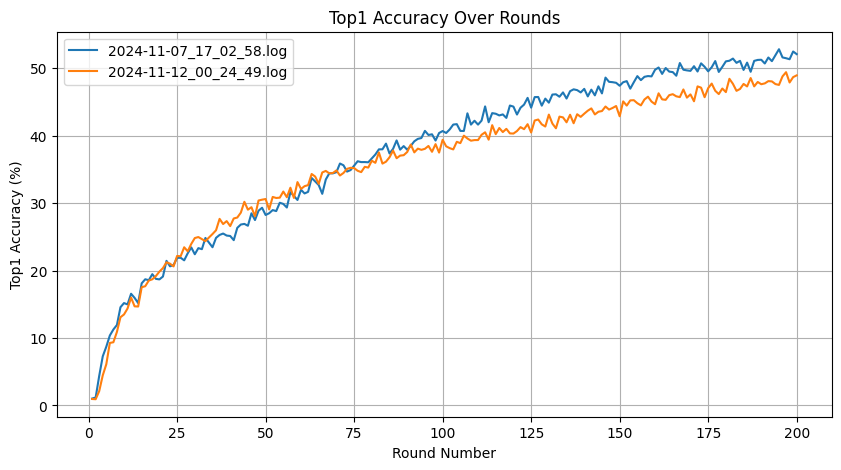

In [1]:
import re
import os
import matplotlib.pyplot as plt


def parse_log_file(file_path):
    with open(file_path, "r") as file:
        content = file.readlines()

    # Initialize lists to store rounds and acc_top1 values
    rounds = []
    acc_top1 = []

    # Temporary variable to store the current round
    current_round = None

    # Iterate over each line to capture relevant data
    for line in content:
        # Match round number
        round_match = re.search(r"Server: round (\d+) begin", line)
        if round_match:
            current_round = int(round_match.group(1))

        # Match acc_top1 value, using the most recent round number
        acc_top1_match = re.search(
            r"Server: The evaluation metrics are: \{'acc_top5': [\d.]+, 'acc_top1': ([\d.]+)\}",
            line,
        )
        if acc_top1_match and current_round is not None:
            rounds.append(current_round)
            acc_top1.append(float(acc_top1_match.group(1)))

    return rounds, acc_top1


def main():
    # Specify the log file paths to load
    log_files = [
        "logs/c10_cifar100/2024-11-07_17_02_58.log",
        "logs/c20_cifar100/2024-11-12_00_24_49.log",
    ]

    plt.figure(figsize=(10, 5))

    for log_file in log_files:
        rounds, acc_top1 = parse_log_file(log_file)
        label = os.path.basename(log_file)
        plt.plot(rounds, acc_top1,  linestyle="-", label=label)

    plt.title("Top1 Accuracy Over Rounds")
    plt.xlabel("Round Number")
    plt.ylabel("Top1 Accuracy (%)")
    plt.legend()
    plt.grid(True)
    plt.show()


if __name__ == "__main__":
    main()